## AFINN Linear Regression Model_AMD
### User star rating

In [1]:
#Import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#Import csv file (binned data)
user_stars=pd.read_csv('Resources/UserStars.csv')
user_stars.tail()

,SAnorm_score,stars
323305,8.004166,5
323306,1.414214,5
323307,4.050814,5
323308,6.971370,4
323309,3.130495,5


In [3]:
user_stars.SAnorm_score.values.reshape(-1,1)

array([[7.77817459],
       [1.58113883],
       [6.14700856],
       ...,
       [4.05081361],
       [6.97137002],
       [3.13049517]])

In [5]:
#Assign data to X and y
X=user_stars.SAnorm_score.values.reshape(-1,1)
y=user_stars.stars.values.reshape(-1,1)
print("Shape:", X.shape, y.shape)

Shape: (323310, 1) (323310, 1)


In [6]:
#Create a model and fit the model to the data
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

#Create a linear model
model=LinearRegression()

#Fit the model to the data
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
#Quantify model by looking at MSE and R2
#Import depencies
from sklearn.metrics import mean_squared_error, r2_score

#Use model to predict a value
predicted= model.predict(X)

mse=mean_squared_error(y,predicted)
r2= r2_score(y, predicted)

print("Accuracy of model")
print(f"MSE: {mse}")
print(f"R2: {r2}")

Accuracy of model
MSE: 0.9984269342101284
R2: 0.2195240059353596


In [8]:
#Overall Score for the model
print('Overall model score')
model.score(X,y)

Overall model score


0.2195240059353596

In [9]:
#Testing and Training Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
X_test

array([[ 0.        ],
       [ 1.06066017],
       [-3.57770876],
       ...,
       [ 3.13049517],
       [-0.83205029],
       [ 3.        ]])

In [10]:
# Test the model using training data
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
#Score model using unseen testing data
model.score(X_test, y_test)

0.22246748515904957

In [12]:
#Get coefficient and intercept of model
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"min: {x_min}")
print(f"max: {x_max}")
print(f"coef: {model.coef_}")
print(f"interct: {model.intercept_}")

min: [[-17.33528757]]
max: [[19.39814774]]
coef: [[0.18143585]]
interct: [2.94195629]


In [13]:
#Calculate y_min and y_max using model.predict and x_min and x_max
y_min = model.predict(x_min)
y_max = model.predict(x_max)

Text(0.5,0,'AFINN SA Score')

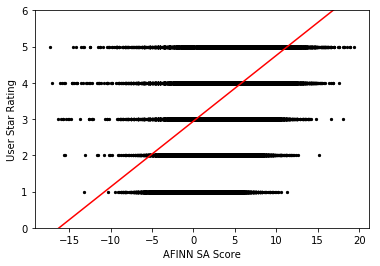

In [28]:
plt.scatter(X,y, color='black', s=5)
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c= 'red')
plt.ylim(0,6)
plt.ylabel('User Star Rating')
plt.xlabel ('AFINN SA Score')
#plt.savefig('UserRating_SA.png', dpi=300)
